In [1]:
import numpy as np
from pydub import AudioSegment
from pydub.generators import Sine
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
from IPython.display import Audio

import librosa
import librosa.display
import sounddevice as sd
import scipy.signal
from scipy.fftpack import fft
from scipy.io.wavfile import write
import pandas as pd

C:\Users\Shashank Suthrave\AppData\Roaming\Python\Python37\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [26]:


# Audio recording parameters
samplerate = 44100  # Sample rate in Hz
channels = 2        # Stereo audio
duration = 3       # Duration in seconds

def record_audio(filename):
    print("Recording started... Speak now!")
    
    # Record audio
    audio_data = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=channels, dtype='float32')
    sd.wait()  # Wait for the recording to complete
    
    print("Recording finished! Playing the audio...")
        # Save as WAV file
    sf.write(filename, audio_data, samplerate)

    # Return the recorded audio for playback
    return audio_data



In [27]:
# Record audio
filename1 = "audio_data1.wav" 
audio_data1 = record_audio(filename1)

# Play the recorded audio in Jupyter Notebook
Audio(audio_data1.T, rate=samplerate)

Recording started... Speak now!
Recording finished! Playing the audio...


In [7]:
def load_audio(file_path, sample_rate=None):
    y, sr = librosa.load(file_path, sr=sample_rate)
    return y, sr

def compute_fft(y, sr):
    N = len(y)
    T = 1.0 / sr
    yf = scipy.fftpack.fft(y)
    xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
    return xf, 2.0 / N * np.abs(yf[:N // 2])

def compute_mfcc(y, sr, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs

def compute_spectrogram(y, sr):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    return D

def energy_normalization(mfccs):
    return librosa.util.normalize(mfccs, axis=1)

def compute_zero_crossing_rate(y):
    return librosa.feature.zero_crossing_rate(y)

def compute_chroma_feature(y, sr):
    return librosa.feature.chroma_stft(y=y, sr=sr)

def compute_spectral_centroid(y, sr):
    return librosa.feature.spectral_centroid(y=y, sr=sr)

def compute_spectral_bandwidth(y, sr):
    return librosa.feature.spectral_bandwidth(y=y, sr=sr)

def compute_spectral_rolloff(y, sr):
    return librosa.feature.spectral_rolloff(y=y, sr=sr)

# --- Plotting Functions ---

def plot_audio_signal(y, sr):
    plt.figure()
    librosa.display.waveshow(y, sr=sr)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Audio Signal")
    plt.show()

def plot_fft_spectrum(xf, fft_mag):
    plt.figure()
    plt.plot(xf, fft_mag, label='FFT Spectrum')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("FFT Spectrum")
    plt.legend()
    plt.show()

def plot_mfcc_features(mfccs):
    plt.figure()
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")
    plt.title("MFCC Features")
    plt.show()

def plot_spectrogram(spectrogram, sr):
    plt.figure()
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(label="Decibels (dB)")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (log scale)")
    plt.title("Spectrogram")
    plt.show()

def plot_mfcc_energy_normalization(mfccs, mfccs_norm):
    plt.figure()
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")
    plt.title("MFCC Before Energy Normalization")
    plt.show()
    
    plt.figure()
    librosa.display.specshow(mfccs_norm, x_axis='time')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")
    plt.title("MFCC After Energy Normalization")
    plt.show()

# --- Additional Plots ---

def plot_zero_crossing_rate(zcr):
    plt.figure()
    plt.plot(zcr[0])
    plt.xlabel("Frames")
    plt.ylabel("Zero Crossing Rate")
    plt.title("Zero Crossing Rate Over Time")
    plt.show()

def plot_chroma_feature(chroma):
    plt.figure()
    librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
    plt.colorbar(label="Intensity")
    plt.xlabel("Time (s)")
    plt.ylabel("Chroma")
    plt.title("Chroma Feature")
    plt.show()

def plot_spectral_centroid(spectral_centroid):
    plt.figure()
    plt.plot(spectral_centroid[0])
    plt.xlabel("Frames")
    plt.ylabel("Spectral Centroid")
    plt.title("Spectral Centroid Over Time")
    plt.show()

def plot_spectral_bandwidth(spectral_bandwidth):
    plt.figure()
    plt.plot(spectral_bandwidth[0])
    plt.xlabel("Frames")
    plt.ylabel("Spectral Bandwidth")
    plt.title("Spectral Bandwidth Over Time")
    plt.show()

def plot_spectral_rolloff(spectral_rolloff):
    plt.figure()
    plt.plot(spectral_rolloff[0])
    plt.xlabel("Frames")
    plt.ylabel("Spectral Roll-off Frequency")
    plt.title("Spectral Roll-off Over Time")
    plt.show()



In [8]:
y, sr_actual = load_audio(filename1)
xf, fft_mag = compute_fft(y, sr_actual)
mfccs = compute_mfcc(y, sr_actual)
spectrogram = compute_spectrogram(y, sr_actual)
mfccs_norm = energy_normalization(mfccs)
zcr = compute_zero_crossing_rate(y)
chroma = compute_chroma_feature(y, sr_actual)
spectral_centroid = compute_spectral_centroid(y, sr_actual)
spectral_bandwidth = compute_spectral_bandwidth(y, sr_actual)
spectral_rolloff = compute_spectral_rolloff(y, sr_actual)

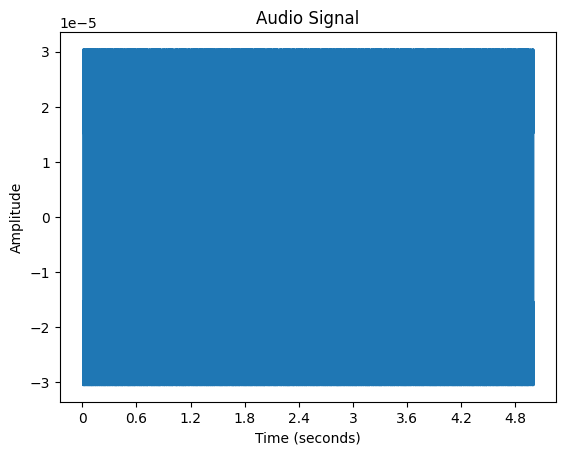

In [9]:
plot_audio_signal(y, sr_actual)

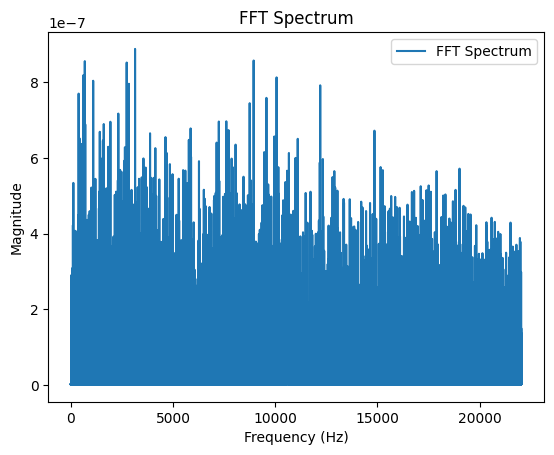

In [10]:
plot_fft_spectrum(xf, fft_mag)

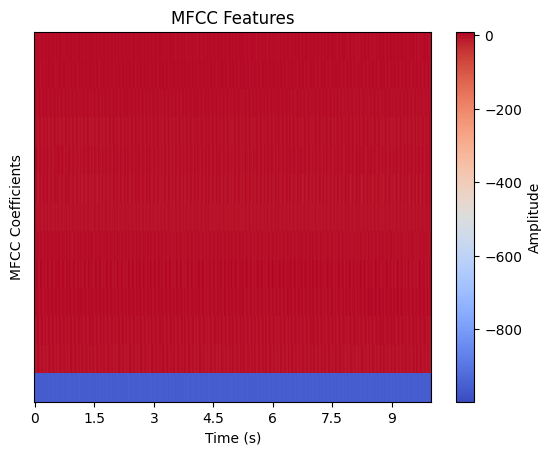

In [11]:
plot_mfcc_features(mfccs)


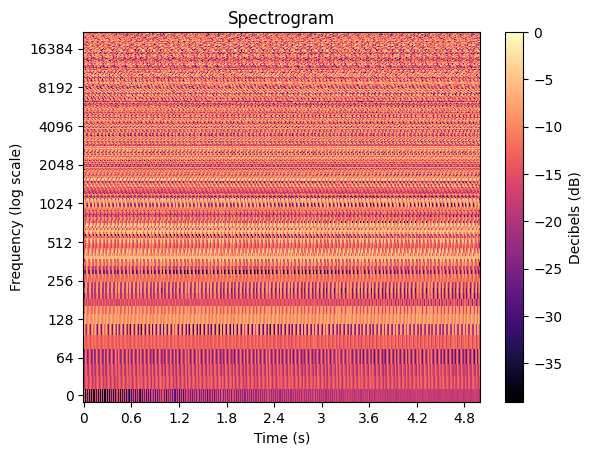

In [12]:
plot_spectrogram(spectrogram, sr_actual)

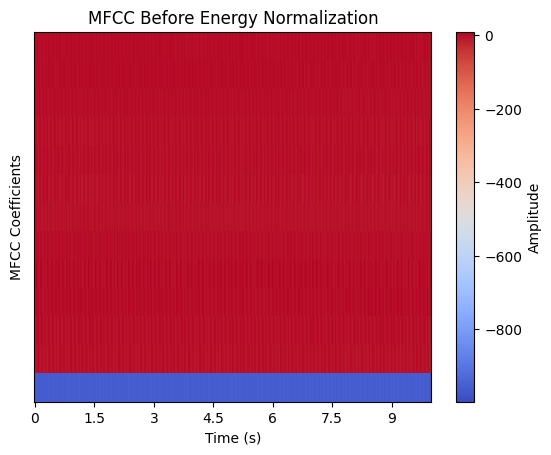

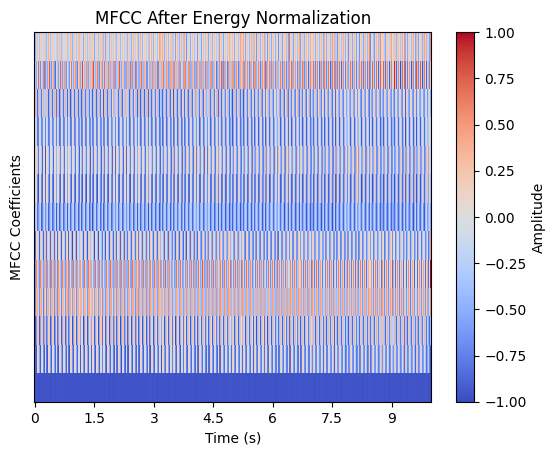

In [13]:
plot_mfcc_energy_normalization(mfccs, mfccs_norm)

In [14]:
import pandas as pd
import numpy as np

def process_audio(file_path, sample_rates):
    data = []
    for sr in sample_rates:
        y, sr_actual = load_audio(file_path, sr)
        xf, fft_mag = compute_fft(y, sr_actual)
        mfccs = compute_mfcc(y, sr_actual)
        spectrogram = compute_spectrogram(y, sr_actual)
        mfccs_norm = energy_normalization(mfccs)
        
        Mfcc_zcr = compute_zero_crossing_rate(y)
        Mfcc_chroma = compute_chroma_feature(y, sr_actual)
        Mfcc_spectral_centroid = compute_spectral_centroid(y, sr_actual)
        Mfcc_spectral_bandwidth = compute_spectral_bandwidth(y, sr_actual)
        Mfcc_spectral_rolloff = compute_spectral_rolloff(y, sr_actual)
        
        data.append([
            sr_actual, np.mean(fft_mag), np.mean(mfccs), np.mean(mfccs_norm),
            np.mean(Mfcc_zcr), np.mean(Mfcc_chroma), np.mean(Mfcc_spectral_centroid),
            np.mean(Mfcc_spectral_bandwidth), np.mean(Mfcc_spectral_rolloff)
        ])
    
    df = pd.DataFrame(data, columns=[
        'Sample Rate', 'FFT Mean', 'MFCC Mean', 'MFCC Normalized Mean',
        'Zero Crossing Rate Mean', 'Chroma Feature Mean', 'Spectral Centroid Mean',
        'Spectral Bandwidth Mean', 'Spectral Rolloff Mean'
    ])
    
    return df


In [15]:
# Define sample rates to test
filename1 = filename1
sample_rates = [8000, 16000, 22050, 44100]
df_results = process_audio(filename1, sample_rates)


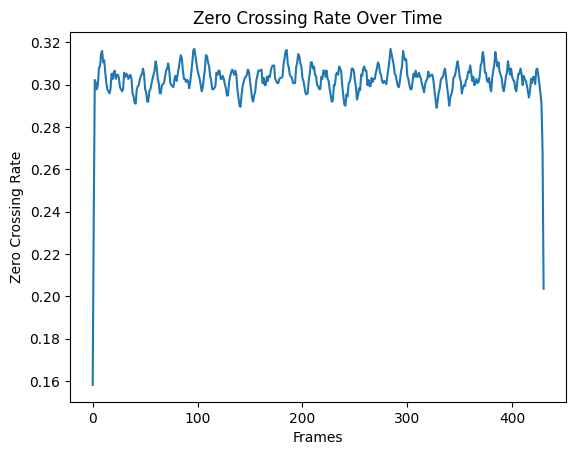

In [16]:
plot_zero_crossing_rate(zcr)

In [17]:
df_results

,Sample Rate,FFT Mean,MFCC Mean,MFCC Normalized Mean,Zero Crossing Rate Mean,Chroma Feature Mean,Spectral Centroid Mean,Spectral Bandwidth Mean,Spectral Rolloff Mean
0,8000,1.226096e-08,-76.194565,-0.435828,0.487546,0.764201,1942.352563,1099.218198,3268.641218
1,16000,1.343623e-08,-75.162788,-0.339416,0.487277,0.836370,3808.832589,2215.629822,6553.393710
2,22050,1.433824e-08,-75.568710,-0.407554,0.508821,0.885169,5268.811836,3050.373513,8933.687337
3,44100,1.748599e-08,-75.840752,-0.294821,0.302256,0.826900,10839.796117,6358.176660,18598.692177


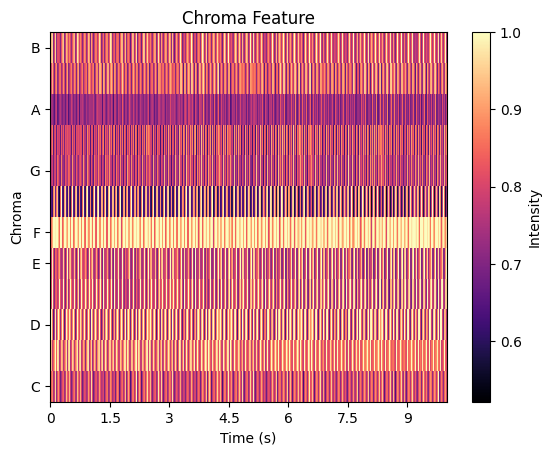

In [18]:
plot_chroma_feature(chroma)

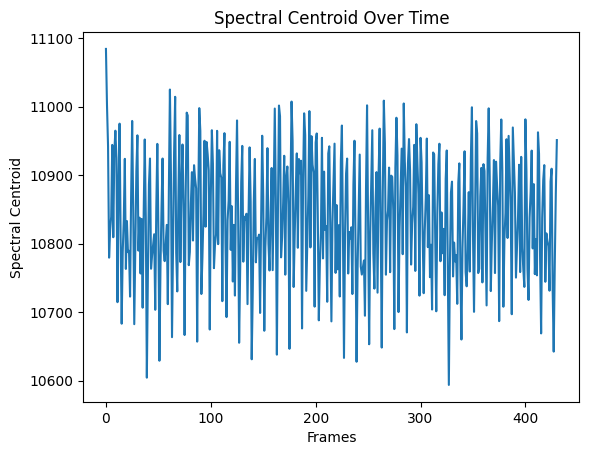

In [19]:
plot_spectral_centroid(spectral_centroid)


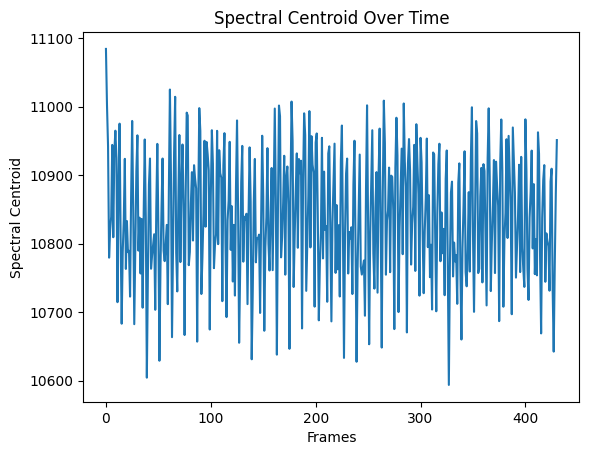

In [20]:
plot_spectral_centroid(spectral_centroid)


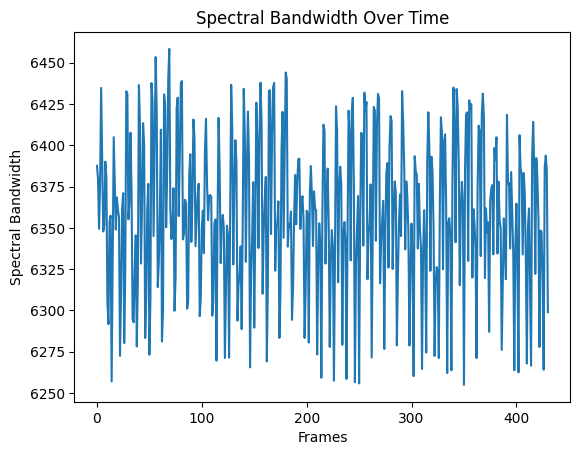

In [21]:
plot_spectral_bandwidth(spectral_bandwidth)


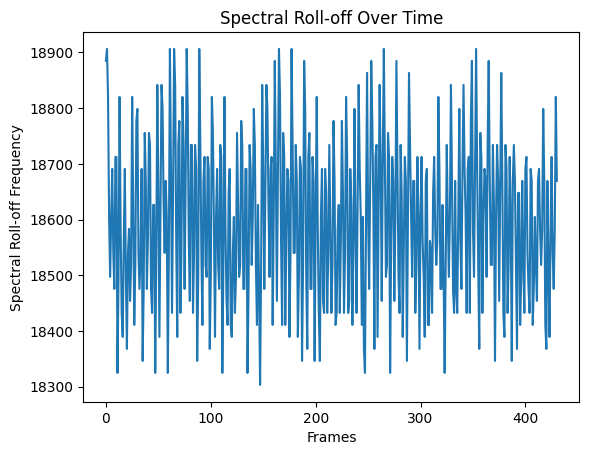

In [22]:
plot_spectral_rolloff(spectral_rolloff)